In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

In [69]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [70]:
data = pd.read_csv('/content/covid_impact_on_airport_traffic_chile.csv')

In [71]:
data.head()

,Country,Date_th,PercentOfBaseline
0,Chile,1,96
1,Chile,2,72
2,Chile,3,56
3,Chile,4,52
4,Chile,5,53


In [72]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Date_th              119.500000
PercentOfBaseline     34.273109
dtype: float64

In [73]:
data.isnull().sum()

Country              0
Date_th              0
PercentOfBaseline    0
dtype: int64

In [74]:
data.isna().sum()

Country              0
Date_th              0
PercentOfBaseline    0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            238 non-null    object
 1   Date_th            238 non-null    int64 
 2   PercentOfBaseline  238 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


In [76]:
data.nunique()

Country                1
Date_th              238
PercentOfBaseline     61
dtype: int64

In [77]:
# data_chile = data_pilihan[data_pilihan['Country']=='Chile']
# data_chile

In [78]:
# data_chile.set_index('Date',inplace=True)
# data_chile

In [79]:
time = data['Date_th']
series = data['PercentOfBaseline']

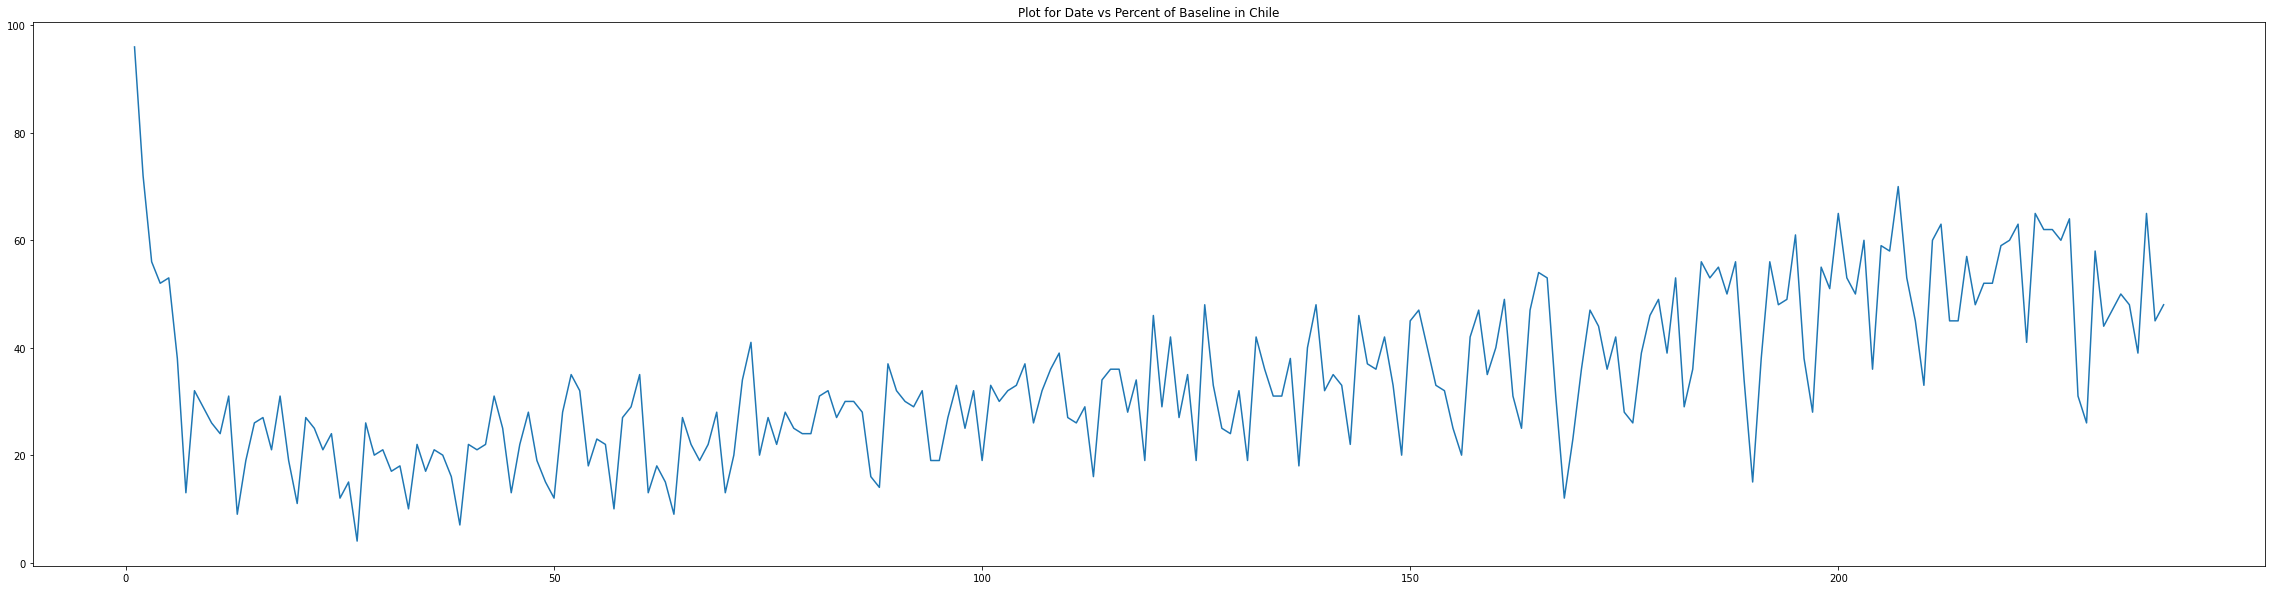

In [80]:
plt.figure(figsize=(40,10))
plt.plot(time,series)
plt.title("Plot for Date vs Percent of Baseline in Chile")
plt.show()

In [81]:
split_time = 119
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

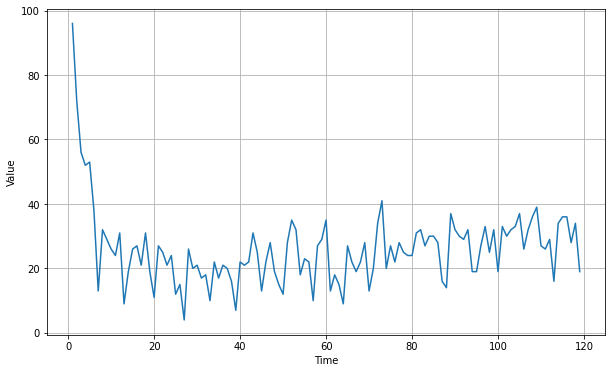

In [82]:
plot_series(time_train, x_train)

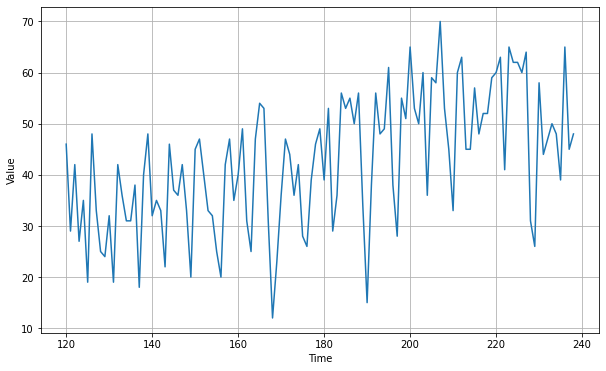

In [83]:
plot_series(time_valid, x_valid)

In [84]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [85]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [86]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [87]:
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


In [88]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])
print("Layer weights: \n {} \n".format(l0.get_weights()))
model.summary()

Layer weights: 
 [array([[ 0.38379234],
       [ 0.08598202],
       [-0.37963486],
       [-0.23290417],
       [ 0.34897023],
       [-0.5130972 ],
       [ 0.2626543 ],
       [ 0.41544896],
       [-0.30453402],
       [-0.31213135],
       [ 0.38097465],
       [-0.49923775],
       [ 0.2570116 ],
       [ 0.29795712],
       [-0.41263688],
       [ 0.24666566],
       [-0.06702176],
       [ 0.19102108],
       [-0.3220421 ],
       [-0.1808083 ]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

In [90]:
model.fit(dataset,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 9ms/step - loss: 1153.7429
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 672.8275
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 267.2173
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 189.2072
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 238.7820
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 249.8248
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 209.0032
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 175.2422
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 159.4436
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 169.9847
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 178.2996
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 170.6224
Epoch 13/100
4/4 [==================

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
